# Text Classification with Scikit-learn
This notebook explores traditional approaches to text classification. These approaches were used before deep learning was applied to Natural Language Processing. These methods are still quick and effective for training a text classifier.

## Data
The data set used in this notebook is the 20 Newsgroups data set, which is a classic collection of text documents that is often used as a benchmark for text classification models. The set contains texts about differing topics.

In [13]:
# import data
from sklearn.datasets import fetch_20newsgroups

# import data manipulation and visualisation packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5

# import models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
train_data = fetch_20newsgroups(subset='train', shuffle=True, random_state=1234)
test_data = fetch_20newsgroups(subset='test')

print("Training texts:", len(train_data.data))
print("Test texts:", len(test_data.data))

Training texts: 11314
Test texts: 7532


## Preprocessing
Preprocessing is the first step in developing a NLP model. This involves transforming the text from word sequences to feature vectors. These feature vectors contain their values for each of a large number of features.

In the notebook we will employ the "bag-of-words" approach, where every text is treated as an unordered collection/bag of words (ngrams), and the raw feature vectors consist of the count of each word that occurs in a text. In Scikit-learn, these raw feature vectors can be created with CountVectorizer, which tokenizes a text and counts the number of times any given text contains every token in the corpus.

The raw counts are not informative by themselves as they include words such as "the". We are interested in words that occur often in one text, but not often in the corpus as a whole, such as "computer". The features will be weighte by their "tf-idf" score, which counts the number of times every token appears in a text and divides it (the logarithm of) the percentage of corpus documents that contain that token. This is achieved by using TfidTransformer.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [7]:
preprocessing = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

In [16]:
train_preprocessed = preprocessing.fit_transform(train_data.data)
test_preprocessed = preprocessing.transform(test_data.data)

## Training
We will train three text classification models on the preprocessed training data:
- Naive Bayes 
- Support Vector Machines
- Logistic Regression

In [22]:
nb_classifier = MultinomialNB()
nb_classifier.fit(train_preprocessed, train_data.target)
nb_predictions = nb_classifier.predict(test_preprocessed)

In [23]:
svm_classifier = LinearSVC()
svm_classifier.fit(train_preprocessed, train_data.target)
svm_predictions = svm_classifier.predict(test_preprocessed)

In [24]:
lr_classifier = LogisticRegression(multi_class="ovr")
lr_classifier.fit(train_preprocessed, train_data.target)
lr_predictions = lr_classifier.predict(test_preprocessed)

Now let's see how each classifier performed:

In [25]:
print("NB Accuracy:", np.mean(nb_predictions == test_data.target))
print("SVM Accuracy:", np.mean(svm_predictions == test_data.target))
print("LR Accuracy:", np.mean(lr_predictions == test_data.target))

NB Accuracy: 0.7738980350504514
SVM Accuracy: 0.8531598513011153
LR Accuracy: 0.8278013807753585


#### Grid search
Currently, we are just using the default values for most hyperparameters. We will use a grid search to further optimise the results. 

We will use grid search to optimimse the C hyperparameter, which controls the degree of regularisation in SVMs and logistic regression. Regularisation reduces overfitting by applying a penalty on large parameter values in the model.

In [26]:
parameters = {'C': np.logspace(0, 3, 10)}
parameters = {'C': [0.1, 1, 10, 100, 1000]}

In [29]:
# grid search for SVM
svm_best = GridSearchCV(svm_classifier, parameters, cv=3, verbose=1)
svm_best.fit(train_preprocessed, train_data.target)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\vinhe\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.8min finished


GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, verbose=1)

In [30]:
# grid search for logistic regression
lr_best = GridSearchCV(lr_classifier, parameters, cv=3, verbose=1)
lr_best.fit(train_preprocessed, train_data.target)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\vinhe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vinhe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

C:\Users\vinhe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vinhe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vinhe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vinhe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vinhe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vinhe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vinhe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vinhe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=3, estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, verbose=1)

Let's see what were the optimal hyperparameter values:

In [31]:
print("Best SVM parameters", svm_best.best_params_)
print("Best LR parameters", lr_best.best_params_)

Best SVM parameters {'C': 1}
Best LR parameters {'C': 1000}


Let's reapply these models with the newly optimised hyperparameters. For SVM the default value was the best option. For logistic regression the regularisation value can be increased to 1000.

In [34]:
best_svm_predictions = svm_best.predict(test_preprocessed)
best_lr_predictions = lr_best.predict(test_preprocessed)

In [35]:
print("Best SVM Accuracy:", np.mean(best_svm_predictions == test_data.target))
print("Best LR Accuracy:", np.mean(best_lr_predictions == test_data.target))

Best SVM Accuracy: 0.8531598513011153
Best LR Accuracy: 0.8515666489644185


## Further Evaluation
We can see that SVM was the best performing model in terms of accuracy.
Now let's see how it performs in terms of precision, recall and F-scores.

#### Classification report

In [36]:
print(classification_report(test_data.target, best_svm_predictions, target_names=test_data.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.80      0.81       319
           comp.graphics       0.76      0.80      0.78       389
 comp.os.ms-windows.misc       0.77      0.73      0.75       394
comp.sys.ibm.pc.hardware       0.71      0.76      0.74       392
   comp.sys.mac.hardware       0.84      0.86      0.85       385
          comp.windows.x       0.87      0.76      0.81       395
            misc.forsale       0.83      0.91      0.87       390
               rec.autos       0.92      0.91      0.91       396
         rec.motorcycles       0.95      0.95      0.95       398
      rec.sport.baseball       0.92      0.95      0.93       397
        rec.sport.hockey       0.96      0.98      0.97       399
               sci.crypt       0.93      0.94      0.93       396
         sci.electronics       0.81      0.79      0.80       393
                 sci.med       0.90      0.87      0.88       396
         

#### Confusion matrix
A confusion matrix is a visual representation of classifier's errors. The rows represent the actual labels and the columns represent the predictions of our classifier. Therefore all correct predictions lie on the diagonal, where the actual label and the predicted label are the same. The predictions elsewhere in the matrix allow us to see which classes are labelled incorrectly up by our classifier. The below confusion matrix shows that 88 documents with the label talk.politics.misc incorrectly received the label talk.politics.guns.

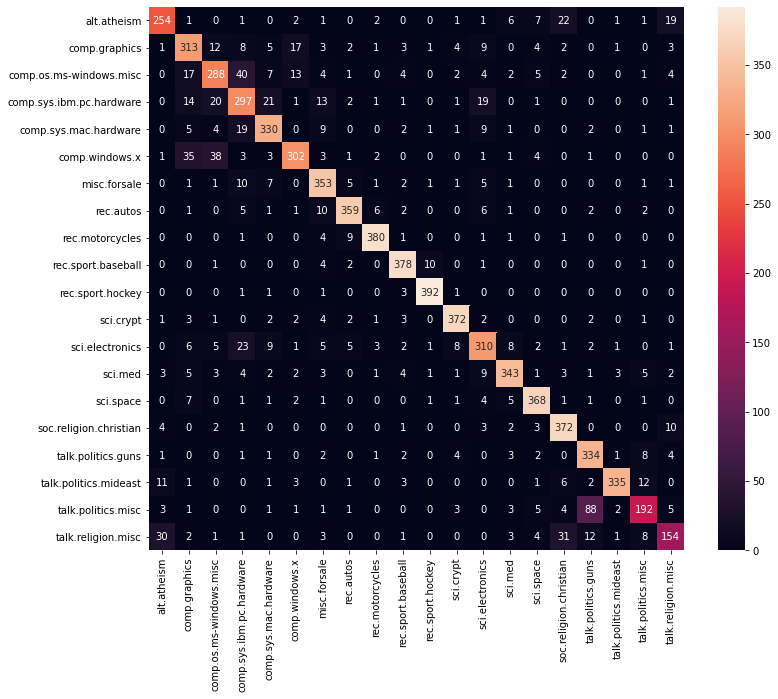

In [40]:
cm = confusion_matrix(test_data.target, best_svm_predictions)
cm_df = pd.DataFrame(cm, index=test_data.target_names, columns=test_data.target_names)

plt.figure(figsize=(12,10))
sns.heatmap(cm_df, annot=True, vmin=0, vmax=cm.max(), fmt='d')

### Interpretability
Let's see what features have the highest weightings for each of the classes. This will help us understand if the model indeed captures the phenomena we'd like it to capture. 

eli5is a python library that works with scikit-learn. The explain_weights function takes a trained model, a list of feature names and target names, and prints out the features that have the highest positive values for each of the targets. The results convince us that our SVM indeed models the correct information: it sees a strong link between the "atheism" class and words such as atheism and atheists, between "computer graphics" and words such as 3d and image, and so on.

In [43]:
eli5.explain_weights(svm_best.best_estimator_,
                    feature_names = preprocessing.named_steps["vect"].get_feature_names(),
                    target_names = train_data.target_names
                    )

Explanation(estimator='LinearSVC(C=1)', description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='alt.atheism', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='atheism', weight=2.444414568786035, std=None, value=None), FeatureWeight(feature='keith', weight=1.9907410361001092, std=None, value=None), FeatureWeight(feature='atheists', weight=1.806432088006814, std=None, value=None), FeatureWeight(feature='islamic', weight=1.4966361149787077, std=None, value=None), FeatureWeight(feature='cobb', weight=1.473800553838005, std=None, value=None), FeatureWeight(feature='rushdie', weight=1.460252692418265, std=None, value=None), FeatureWeight(feature='wingate', weight=1.3886267333680624, std=None, value=None), FeatureWeight(feature='okcforum', weight=1.3172095740124163, std=None, value=None), FeatureWeight(feature='jaeger', weight=1.2835443947526273, std=None, value=None), FeatureWeight(feature='mangoe', weight=1.2690533896806724, std=None, value=None), FeatureWeight(feature='mathew', weight=1.2164337228023667, std=None, value=None), FeatureWeight(feature='enviroleague', weight=1.1876988698683115, std=None, value=None), FeatureWeight(feature='charley', weight=1.1697274487626648, std=None, value=None), FeatureWeight(feature='motto', weight=1.1074884836337566, std=None, value=None), FeatureWeight(feature='livesey', weight=1.1070131016692797, std=None, value=None), FeatureWeight(feature='benedikt', weight=1.102539849457604, std=None, value=None), FeatureWeight(feature='osrhe', weight=1.102431586151945, std=None, value=None), FeatureWeight(feature='tammy', weight=1.0991801282508844, std=None, value=None), FeatureWeight(feature='bsa', weight=1.0970739571190489, std=None, value=None)], neg=[FeatureWeight(feature='<BIAS>', weight=-1.0850544649857987, std=None, value=None)], pos_remaining=11429, neg_remaining=35133), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='comp.graphics', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='graphics', weight=3.8911392523914086, std=None, value=None), FeatureWeight(feature='3d', weight=2.346564384276649, std=None, value=None), FeatureWeight(feature='image', weight=2.2826411012490495, std=None, value=None), FeatureWeight(feature='3do', weight=2.125600293034997, std=None, value=None), FeatureWeight(feature='pov', weight=2.0833399847093523, std=None, value=None), FeatureWeight(feature='images', weight=2.0091472152270295, std=None, value=None), FeatureWeight(feature='tiff', weight=1.9832268816232512, std=None, value=None), FeatureWeight(feature='cview', weight=1.9681186267153932, std=None, value=None), FeatureWeight(feature='polygon', weight=1.816838545933696, std=None, value=None), FeatureWeight(feature='animation', weight=1.7772102409714314, std=None, value=None), FeatureWeight(feature='format', weight=1.5560880022309183, std=None, value=None), FeatureWeight(feature='mpeg', weight=1.5422354116440833, std=None, value=None), FeatureWeight(feature='surface', weight=1.4634537361664732, std=None, value=None), FeatureWeight(feature='sphere', weight=1.4588714292518614, std=None, value=None), FeatureWeight(feature='points', weight=1.3844921377495976, std=None, value=None), FeatureWeight(feature='42', weight=1.2520567781191312, std=None, value=None), FeatureWeight(feature='fractals', weight=1.247495482746414, std=None, value=None), FeatureWeight(feature='quicktime', weight=1.2471432751654135, std=None, value=None), Feat

## Conclusion
This notebook shows how to quickly train a text classifier. These methods provide a good baseline and help improve one's understanding of the data. These baselines can them be used as a measure against 'black-box' deep learning models.